## Holiday Package Prediciton

1. Problem Statement

"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. 
One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 
types of packages the company is offering * Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of
the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was 
quite high because customers were contacted at random without looking at the available information. The company
is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that
allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of
well-being. However, this time company wants to harness the available data of existing and potential customers to
make the marketing expenditure more efficient.

In [1]:
import kagglehub
import pandas as pd
import numpy as np              
import os
# Duration of the pitch by a salesperson to the customer

In [2]:
df = pd.read_csv('/Users/Anubhav/Documents/ML Project/HolidayPackagePredictor/Travel.csv')

In [3]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
df.select_dtypes(include=np.number)

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
0,200000,1,41.0,3,6.0,3,3.0,3.0,1.0,1,2,1,0.0,20993.0
1,200001,0,49.0,1,14.0,3,4.0,4.0,2.0,0,3,1,2.0,20130.0
2,200002,1,37.0,1,8.0,3,4.0,3.0,7.0,1,3,0,0.0,17090.0
3,200003,0,33.0,1,9.0,2,3.0,3.0,2.0,1,5,1,1.0,17909.0
4,200004,0,NaN,1,8.0,2,3.0,4.0,1.0,0,5,1,0.0,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,3,9.0,3,5.0,4.0,2.0,1,1,1,1.0,26576.0
4884,204884,1,28.0,1,31.0,4,5.0,3.0,3.0,1,3,1,2.0,21212.0
4885,204885,1,52.0,3,17.0,4,4.0,4.0,7.0,0,1,1,3.0,31820.0
4886,204886,1,19.0,3,16.0,3,4.0,3.0,3.0,0,5,0,2.0,20289.0


In [5]:
df.select_dtypes(include=np.number).corr()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
CustomerID,1.000000,0.056506,0.032127,0.012975,0.064298,0.604013,0.427539,0.010553,0.224848,0.007974,-0.035847,0.003805,0.511763,0.276833
ProdTaken,0.056506,1.000000,-0.147254,0.086852,0.078257,0.009627,0.112171,0.099577,0.018898,0.260844,0.051394,-0.011508,0.007421,-0.130585
Age,0.032127,-0.147254,1.000000,-0.015625,-0.012063,0.011621,-0.002577,-0.010474,0.184905,0.033399,0.018510,0.048654,0.007370,0.464869
CityTier,0.012975,0.086852,-0.015625,1.000000,0.022703,-0.001671,0.023652,-0.009164,-0.029709,0.001793,-0.042160,0.003817,0.000672,0.051817
DurationOfPitch,0.064298,0.078257,-0.012063,0.022703,1.000000,0.065141,0.009434,-0.006637,0.009715,0.033034,-0.002880,-0.001626,0.031408,-0.006252
NumberOfPersonVisiting,0.604013,0.009627,0.011621,-0.001671,0.065141,1.000000,0.328569,0.033867,0.195223,0.011177,-0.019581,0.010362,0.610621,0.195134
NumberOfFollowups,0.427539,0.112171,-0.002577,0.023652,0.009434,0.328569,1.000000,-0.024176,0.139517,0.004970,0.004054,0.012112,0.286425,0.176503
PreferredPropertyStar,0.010553,0.099577,-0.010474,-0.009164,-0.006637,0.033867,-0.024176,1.000000,0.012115,0.001040,-0.022701,0.015742,0.035798,0.014289
NumberOfTrips,0.224848,0.018898,0.184905,-0.029709,0.009715,0.195223,0.139517,0.012115,1.000000,0.012949,-0.004378,-0.011825,0.168795,0.139105
Passport,0.007974,0.260844,0.033399,0.001793,0.033034,0.011177,0.004970,0.001040,0.012949,1.000000,0.002926,-0.022330,0.020264,0.002545


<Axes: >

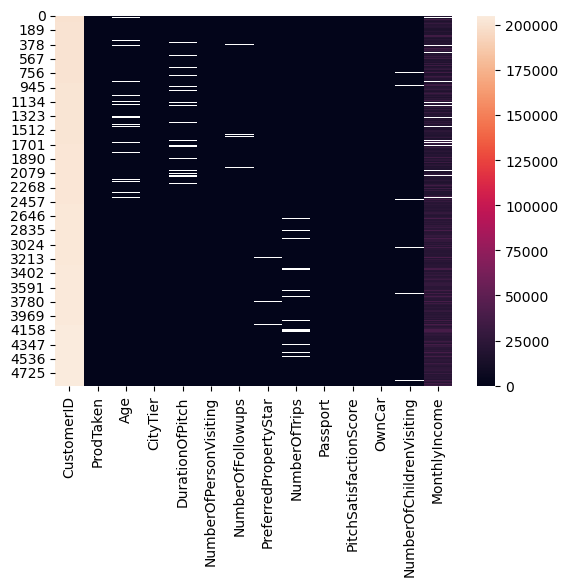

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.select_dtypes(include=np.number))

<Axes: >

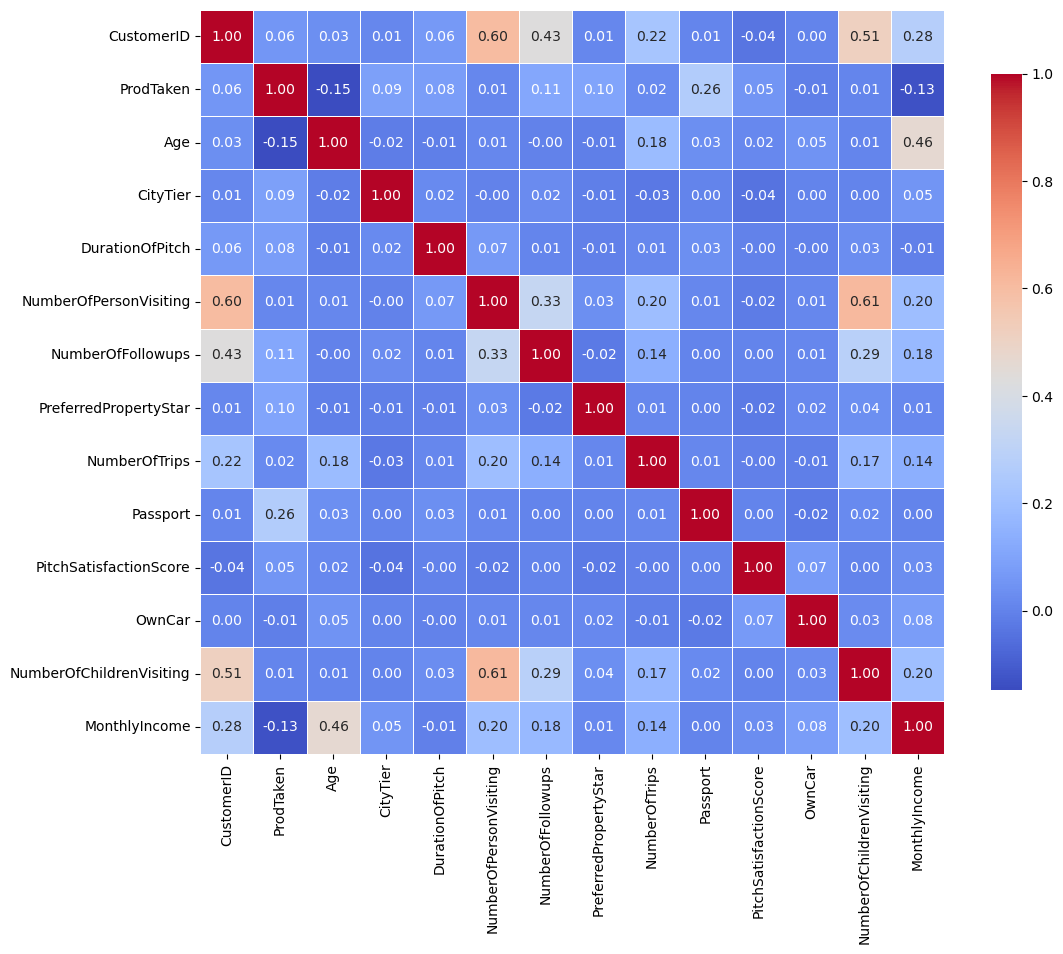

In [7]:
df_numeric = df.select_dtypes(include=[np.number])

# 2. Compute the correlation matrix
corr_matrix = df_numeric.corr()

# 3. Set up the figure size for better readability, especially with many columns
plt.figure(figsize=(12, 10)) 

# 4. Draw the heatmap
# Passing the correlation matrix (a DataFrame) to sns.heatmap 
# ensures both x and y axes are labeled with column names
sns.heatmap(
    corr_matrix, 
    annot=True,       # Show correlation values in the cells
    cmap='coolwarm',  # Use a diverging color palette
    fmt=".2f",        # Format annotations to two decimal places
    square=True,      # Ensure cells are square
    linewidths=0.5,   # Add lines between cells
    cbar_kws={"shrink": .8} # Shrink the color bar a bit
)


<Axes: xlabel='NumberOfPersonVisiting', ylabel='NumberOfChildrenVisiting'>

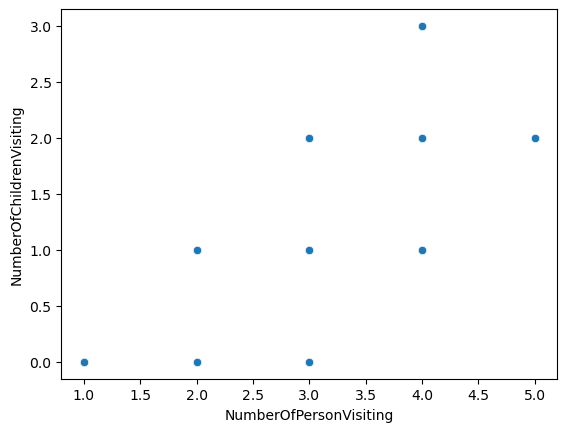

In [15]:
sns.scatterplot(df, x=df['NumberOfPersonVisiting'], y=df['NumberOfChildrenVisiting'])

In [38]:
# 1. Perform Data Cleaning - Handling missing values
# 2. Convert Categorical to Numerical
# 3. Standardization of columns
# 4. TrainTestSplit
# 5. Model Loading
# 6. Pipeline Creation
# 7. Pass data to models throug pipeline
# 8. Evaluate best model - prediction

In [8]:
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [9]:
df.shape

(4888, 20)

In [10]:
num_col_missing = ["Age", "DurationOfPitch", "NumberOfFollowups", "PreferredPropertyStar", "NumberOfTrips", "MonthlyIncome"]
cat_col_missing = ["TypeofContact"]
# "NumberOfChildrenVisiting" -- Removed and checking

In [11]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)
df['DurationOfPitch'].fillna(df['DurationOfPitch'].mode()[0], inplace=True)
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0], inplace=True)
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0], inplace=True)
df['NumberOfTrips'].fillna(df['NumberOfTrips'].mode()[0], inplace=True)              
# df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0], inplace=True)
df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(), inplace=True)

/var/folders/_7/jjr8pnjx00vc_fv_gs3cfq3w0000gn/T/ipykernel_2450/2927198060.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TypeofContact'].fillna(df['TypeofContact'].mode()[0], inplace=True)
/var/folders/_7/jjr8pnjx00vc_fv_gs3cfq3w0000gn/T/ipykernel_2450/2927198060.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we ar

In [12]:
df['Gender'].replace("Fe Male", "Female", inplace=True)

/var/folders/_7/jjr8pnjx00vc_fv_gs3cfq3w0000gn/T/ipykernel_2450/3663211777.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace("Fe Male", "Female", inplace=True)


In [13]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.000000,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.000000,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.000000,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.000000,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,37.622265,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [14]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [15]:
X = df.drop(['ProdTaken', 'NumberOfChildrenVisiting'], axis=1)
Y = df['ProdTaken']

In [16]:
X.shape

(4888, 18)

In [17]:
Y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [18]:
num_col = [col for col in X.columns if X[col].dtype != "object"]
cat_col = [col for col in X.columns if X[col].dtype == "object"]

In [19]:
# num_col -----> Pipeline -----> ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Define numerical pipeline
num_pipeline = Pipeline(
    steps=[("Standardization", StandardScaler(with_mean=False))]
)

# Define categorical pipeline
cat_pipeline = Pipeline(
    steps=[
        ("Encoding",  OneHotEncoder()),
        # Corrected: Provide the StandardScaler object for the standardization step
        ("Standardization", StandardScaler(with_mean=False)) 
    ]
)

ct = ColumnTransformer(
        transformers=[ 
            ("Numerical data", num_pipeline, num_col),
            ("Categorical data", cat_pipeline, cat_col)],
        remainder='drop'
)


In [20]:
trand_x = ct.fit_transform(X)
df_x = pd.DataFrame(trand_x)

# trand_y = ct.fit_transform(Y)
# df_y = pd.DataFrame(trand_y)

In [21]:
trand_x = ct.fit_transform(X)
df_x = pd.DataFrame(trand_x)

In [22]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,141.739022,4.506739,3.273359,0.712598,4.138979,3.005504,3.764479,0.545318,2.201746,1.464502,...,0.0,0.000000,0.000000,2.562588,0.000000,0.0,0.000000,2.090686,0.000000,0.0
1,141.739730,5.386102,1.091120,1.662729,4.138979,4.007338,5.019305,1.090637,0.000000,2.196753,...,0.0,2.527153,0.000000,0.000000,0.000000,0.0,0.000000,2.090686,0.000000,0.0
2,141.740439,4.067057,1.091120,0.950131,4.138979,4.007338,3.764479,3.817229,2.201746,2.196753,...,0.0,0.000000,0.000000,2.562588,0.000000,0.0,2.063581,0.000000,0.000000,0.0
3,141.741148,3.627375,1.091120,1.068897,2.759319,3.005504,3.764479,1.090637,2.201746,3.661255,...,0.0,2.527153,0.000000,0.000000,0.000000,0.0,2.063581,0.000000,0.000000,0.0
4,141.741856,4.135457,1.091120,0.950131,2.759319,3.005504,5.019305,0.545318,0.000000,3.661255,...,0.0,2.527153,0.000000,0.000000,0.000000,0.0,2.063581,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,145.199580,5.386102,3.273359,1.068897,4.138979,5.009173,5.019305,1.090637,2.201746,0.732251,...,0.0,0.000000,0.000000,0.000000,2.886053,0.0,0.000000,2.090686,0.000000,0.0
4884,145.200288,3.077773,1.091120,3.681757,5.518639,5.009173,3.764479,1.635955,2.201746,2.196753,...,0.0,0.000000,0.000000,2.562588,0.000000,0.0,2.063581,0.000000,0.000000,0.0
4885,145.200997,5.715864,3.273359,2.019028,5.518639,4.007338,5.019305,3.817229,0.000000,0.732251,...,0.0,0.000000,2.001813,0.000000,0.000000,0.0,0.000000,0.000000,2.786856,0.0
4886,145.201706,2.088489,3.273359,1.900262,4.138979,4.007338,3.764479,1.635955,0.000000,3.661255,...,0.0,0.000000,0.000000,2.562588,0.000000,0.0,2.063581,0.000000,0.000000,0.0


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_x, Y, random_state=42, test_size=0.2)

In [24]:
X_train.shape

(3910, 34)

In [25]:
y_train.shape

(3910,)

In [26]:
X_test.shape

(978, 34)

In [27]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import r2_score

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


# models = {
#     "Decision Tree Classifier": DecisionTreeClassifier(),
#     "Decision Tree Regressor": DecisionTreeRegressor(),
#     "Random Forest Classifier": RandomForestClassifier(),
#     "Random Forest Regressor": RandomForestRegressor()
# }


models={
    "Logisitic Regression":LogisticRegression(),
    "Decision Tree":DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier(),
    "Gradient Boost":GradientBoostingClassifier()
}

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score


model_score = {}

for key, value in models.items():
    model = value
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(key)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    model_score[key] = model_train_accuracy

    
    print('='*35)
    print('\n')

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logisitic Regression
Model performance for Training set
- Accuracy: 0.8465
- F1 score: 0.8214
- Precision: 0.7009
- Recall: 0.3086
- Roc Auc Score: 0.6392
----------------------------------
Model performance for Test set
- Accuracy: 0.8395
- F1 score: 0.8141
- Precision: 0.6977
- Recall: 0.3141
- Roc Auc Score: 0.6405


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.8855
- F1 score: 0.8850
- Precision: 0.7112
- Recall: 0.6963
- Roc Auc Score: 0.8139


Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9090
- F1 score: 0.8986
- Precision: 0.9722
- Recall: 0.5497
- Roc Auc Score: 0.7730


Gradient Boost
Model performance for Training se

In [31]:
model_score

{'Logisitic Regression': 0.8465473145780051,
 'Decision Tree': 1.0,
 'Random Forest': 1.0,
 'Gradient Boost': 0.8956521739130435}

In [32]:
## Hyperparameter Training
rf_params = {"max_depth": [5, 8, 15, None, 10],
             "max_features": [5, 7, "auto", 8],
             "min_samples_split": [2, 8, 15, 20],
             "n_estimators": [100, 200, 500, 1000]}

In [33]:
rf_params

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [34]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestClassifier(), rf_params)
                   
                   ]

In [35]:
randomcv_models

[('RF',
  RandomForestClassifier(),
  {'max_depth': [5, 8, 15, None, 10],
   'max_features': [5, 7, 'auto', 8],
   'min_samples_split': [2, 8, 15, 20],
   'n_estimators': [100, 200, 500, 1000]})]

In [36]:
from sklearn.model_selection import RandomizedSearchCV
model_param = {}


for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, cv=3, verbose=2, n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=1000; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=1000; total time=   0.0s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=200; total time=   0.6s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=5, min

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
78 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/site-pac

In [37]:
model_param

{'RF': {'n_estimators': 1000,
  'min_samples_split': 2,
  'max_features': 7,
  'max_depth': 15}}

In [38]:
models = {
    "RandomForestClassifier": RandomForestClassifier(n_estimators= 100,
  min_samples_split= 2,
  max_features= 8,
  max_depth= None)
}

In [39]:

model_score = {}

for key, value in models.items():
    model = value
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
    model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score
    model_train_precision = precision_score(y_train, y_train_pred) # Calculate Precision
    model_train_recall = recall_score(y_train, y_train_pred) # Calculate Recall
    model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)


    # Test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
    model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
    model_test_precision = precision_score(y_test, y_test_pred) # Calculate Precision
    model_test_recall = recall_score(y_test, y_test_pred) # Calculate Recall
    model_test_rocauc_score = roc_auc_score(y_test, y_test_pred) #Calculate Roc


    print(key)
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))

    
    
    print('----------------------------------')
    
    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

    model_score[key] = model_train_accuracy

    
    print('='*35)
    print('\n')

RandomForestClassifier
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9182
- F1 score: 0.9110
- Precision: 0.9512
- Recall: 0.6126
- Roc Auc Score: 0.8025




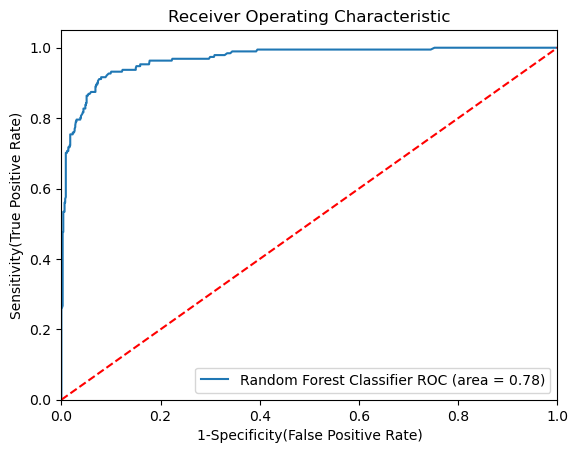

In [40]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score,roc_curve
plt.figure()

# Add the models to the list that you want to view on the ROC plot
auc_models = [
{
    'label': 'Random Forest Classifier',
    'model': RandomForestClassifier(n_estimators=1000,min_samples_split=2,
                                          max_features=7,max_depth=None),
    'auc':  0.7822
},
    
]
# create loop through all model
for algo in auc_models:
    model = algo['model'] # select the model
    model.fit(X_train, y_train) # train the model
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig("auc.png")
plt.show() 